<a href="https://colab.research.google.com/github/Philocreation/My_Deep_learning/blob/main/Time_series_analysis/parking_data_prediction(x).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

reference from : https://dacon.io/competitions/official/235745/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/235745_parking_data.zip

Archive:  /content/drive/MyDrive/235745_parking_data.zip
  inflating: age_gender_info.csv     
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# 파라미터 설정

In [ ]:
SEQUENCE_LENGTH = 10
OFFSET = 1
BATCH_SIZE = 32

# 데이터 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [ ]:
print(len(df))

2952


# 결측치 처리 

In [ ]:
df.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [ ]:
raw_data = df.fillna(0)

In [ ]:
raw_data = raw_data.drop(columns=["단지코드","총세대수","임대건물구분","지역","공급유형","자격유형"])

In [ ]:
raw_data = raw_data.drop(columns=['임대보증금','임대료'])

In [ ]:
raw_data.isnull().sum()

전용면적                            0
전용면적별세대수                        0
공가수                             0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
등록차량수                           0
dtype: int64

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   전용면적                          2952 non-null   float64
 1   전용면적별세대수                      2952 non-null   int64  
 2   공가수                           2952 non-null   float64
 3   도보 10분거리 내 지하철역 수(환승노선 수 반영)  2952 non-null   float64
 4   도보 10분거리 내 버스정류장 수            2952 non-null   float64
 5   단지내주차면수                       2952 non-null   float64
 6   등록차량수                         2952 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 161.6 KB


In [ ]:
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,1:]
y = data[:,:1]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
print(train_x[:5])
print(train_y[:5])

[[ 87.   0.   0.   3. 755. 780.]
 [112.   4.   0.   3. 403. 488.]
 [ 10.  17.   0.   4. 183. 133.]
 [354.  17.   0.   3. 546. 669.]
 [ 90.  21.   0.  16. 911. 934.]]
[[84.92]
 [46.97]
 [26.24]
 [51.86]
 [59.57]]


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2361, 6)
(2361, 1)
(591, 6)
(591, 1)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                70        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


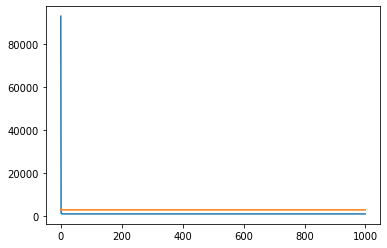

19/19 [==============================] - 0s 2ms/step - loss: 493.0802 - mape: 31.8341
loss= 493.0802001953125
mape= 31.834102630615234


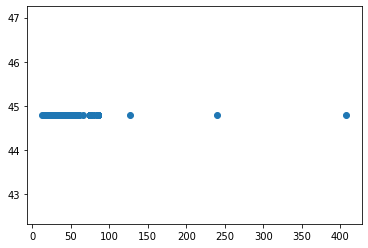

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(6,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()